In [1]:
import pandas as pd
import seaborn as sns
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
df =pd.read_csv('train.csv')
df.head(10)

,Context,Response
0,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb..."
1,I'm going through some things with my feelings...,"Hello, and thank you for your question and see..."
2,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...
3,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...
4,I'm going through some things with my feelings...,I first want to let you know that you are not ...
5,I'm going through some things with my feelings...,"Heck, sure thing, hun!Feelings of 'depression'..."
6,I'm going through some things with my feelings...,You are exhibiting some specific traits of a p...
7,I'm going through some things with my feelings...,That is intense. Depression is a liar. Sometim...
8,I'm going through some things with my feelings...,It sounds like you may be putting yourself las...
9,I'm going through some things with my feelings...,It must be really difficult to experience what...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3512 entries, 0 to 3511
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Context   3512 non-null   object
 1   Response  3508 non-null   object
dtypes: object(2)
memory usage: 55.0+ KB


In [3]:
df.describe()

,Context,Response
count,3512,3508
unique,995,2479
top,I have so many issues to address. I have a his...,It's normal to feel a little anxiety--after al...
freq,94,3


In [ ]:
df.shape

(702, 2)

In [4]:
!python3 -m spacy download en_core_web_sm

!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 52.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


DATA PREPROCESSING

In [5]:
df['Context'] = df['Context'].str.lower()
df['Response'] = df['Response'].str.lower()

df.to_csv('lowercase_dataset.csv', index=False)


In [6]:
import csv


with open('train.csv', 'r', newline='', encoding='utf-8') as file:
    reader = csv.DictReader(file)


    lowercase_data = []

    for row in reader:

        row['Context'] = row['Context'].lower()
        row['Response'] = row['Response'].lower()


        lowercase_data.append(row)


fields = [ 'Context','Response']
with open('lowercase_dataset.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=fields)


    writer.writeheader()


    writer.writerows(lowercase_data)


In [7]:
df = pd.read_csv('lowercase_dataset.csv')
print(df.head())



                                             Context  \
0  i'm going through some things with my feelings...   
1  i'm going through some things with my feelings...   
2  i'm going through some things with my feelings...   
3  i'm going through some things with my feelings...   
4  i'm going through some things with my feelings...   

                                            Response  
0  if everyone thinks you're worthless, then mayb...  
1  hello, and thank you for your question and see...  
2  first thing i'd suggest is getting the sleep y...  
3  therapy is essential for those that are feelin...  
4  i first want to let you know that you are not ...  


In [9]:
df = pd.read_csv('lowercase_dataset.csv')

def remove_punctuation(text):
    if pd.isna(text):
        return text
    else:
        translator = str.maketrans('', '', string.punctuation)
        return text.translate(translator)


df['Context'] = df['Context'].apply(remove_punctuation)
df['Response'] = df['Response'].apply(remove_punctuation)


print(df.head())



                                             Context  \
0  im going through some things with my feelings ...   
1  im going through some things with my feelings ...   
2  im going through some things with my feelings ...   
3  im going through some things with my feelings ...   
4  im going through some things with my feelings ...   

                                            Response  
0  if everyone thinks youre worthless then maybe ...  
1  hello and thank you for your question and seek...  
2  first thing id suggest is getting the sleep yo...  
3  therapy is essential for those that are feelin...  
4  i first want to let you know that you are not ...  


EDA

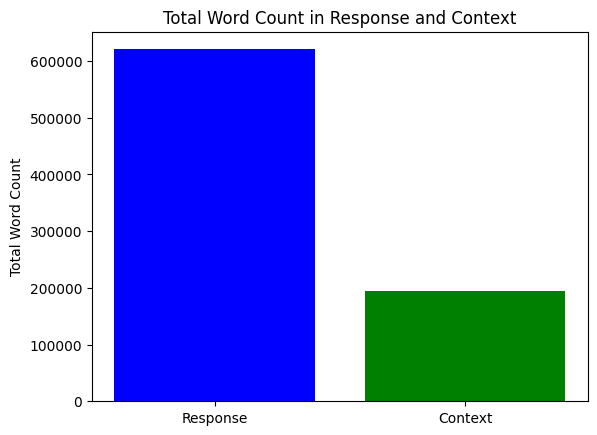

In [10]:
def count_words(text):
    if pd.isna(text):
        return 0
    else:
        return len(text.split())


df['response_word_count'] = df['Response'].apply(count_words)
df['context_word_count'] = df['Context'].apply(count_words)


total_response_words = df['response_word_count'].sum()
total_context_words = df['context_word_count'].sum()

plt.bar(['Response', 'Context'], [total_response_words, total_context_words], color=['blue', 'green'])
plt.title('Total Word Count in Response and Context')
plt.ylabel('Total Word Count')

plt.show()


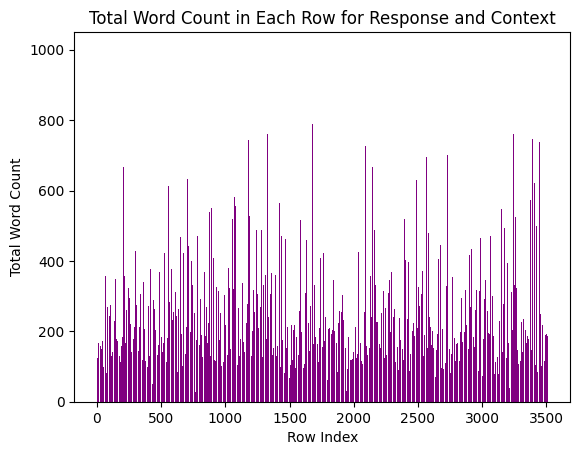

In [11]:
def count_words(text):
    if pd.isna(text):
        return 0
    else:
        return len(text.split())

df['response_word_count'] = df['Response'].apply(count_words)
df['context_word_count'] = df['Context'].apply(count_words)
df['total_words'] = df['response_word_count'] + df['context_word_count']
plt.bar(df.index, df['total_words'], color='purple')
plt.title('Total Word Count in Each Row for Response and Context')
plt.xlabel('Row Index')
plt.ylabel('Total Word Count')

plt.show()


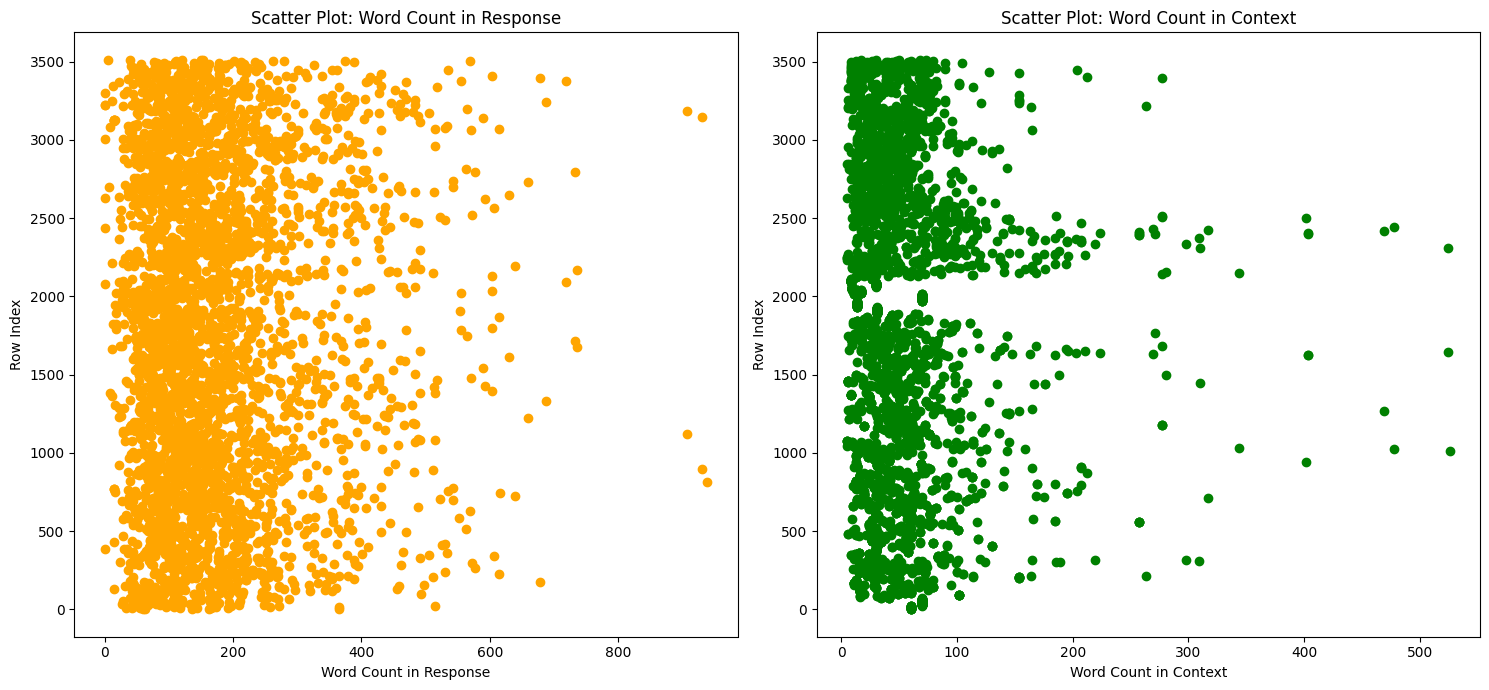

In [12]:

def count_words(text):
    if pd.isna(text):
        return 0
    else:
        return len(text.split())

df['response_word_count'] = df['Response'].apply(count_words)
df['context_word_count'] = df['Context'].apply(count_words)

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.scatter(df['response_word_count'], df.index, color='orange')
plt.title('Scatter Plot: Word Count in Response')
plt.xlabel('Word Count in Response')
plt.ylabel('Row Index')

plt.subplot(1, 2, 2)
plt.scatter(df['context_word_count'], df.index, color='green')
plt.title('Scatter Plot: Word Count in Context')
plt.xlabel('Word Count in Context')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()


In [13]:
df['Context_Word_Count'] = df['Context'].apply(lambda x: len(str(x).split()))
df['Response_Word_Count'] = df['Response'].apply(lambda x: len(str(x).split()))

mean_context = df['Context_Word_Count'].mean()
mean_response = df['Response_Word_Count'].mean()


mode_context = df['Context_Word_Count'].mode().values[0]
mode_response = df['Response_Word_Count'].mode().values[0]

median_context = df['Context_Word_Count'].median()
median_response = df['Response_Word_Count'].median()

print("Context Column:")
print(f"Mean: {mean_context}, Mode: {mode_context}, Median: {median_context}")

print("\nResponse Column:")
print(f"Mean: {mean_response}, Mode: {mode_response}, Median: {median_response}")

high_word_count_responses = df[df['Response_Word_Count'] > 100]


print(high_word_count_responses[['Response', 'Response_Word_Count']])



Context Column:
Mean: 55.171697038724375, Mode: 30, Median: 46.0

Response Column:
Mean: 176.73376993166286, Mode: 92, Median: 144.0
                                               Response  Response_Word_Count
0     if everyone thinks youre worthless then maybe ...                  163
1     hello and thank you for your question and seek...                  365
3     therapy is essential for those that are feelin...                  137
7     that is intense depression is a liar sometimes...                  193
8     it sounds like you may be putting yourself las...                  117
...                                                 ...                  ...
3505  hi there   as someone who has practiced as a c...                  262
3506  the thing that confuses a child the most is fo...                  202
3507  absolutely not it is never in a childs best in...                  150
3508  im sorry you have tension between you and your...                  154
3509  the true answe

In [14]:
def calculate_metrics(text):
    if isinstance(text, str):
        sentences = text.split('.')
        avg_sentence_length = len(text.split()) / max(len(sentences), 1)
        words = text.lower().translate(str.maketrans('', '', string.punctuation)).split()
        vocabulary_size = len(set(words))
        return avg_sentence_length, vocabulary_size
    else:
        return float('nan'), float('nan')

df['Context_Avg_Sentence_Length'], df['Context_Vocabulary_Size'] = zip(*df['Context'].apply(calculate_metrics))
df['Response_Avg_Sentence_Length'], df['Response_Vocabulary_Size'] = zip(*df['Response'].apply(calculate_metrics))
print("Context Column:")
print(f"Average Sentence Length: {df['Context_Avg_Sentence_Length'].mean()}")
print(f"Average Vocabulary Size: {df['Context_Vocabulary_Size'].mean()}")

print("\nResponse Column:")
print(f"Average Sentence Length: {df['Response_Avg_Sentence_Length'].mean()}")
print(f"Average Vocabulary Size: {df['Response_Vocabulary_Size'].mean()}")


Context Column:
Average Sentence Length: 55.171697038724375
Average Vocabulary Size: 39.40746013667426

Response Column:
Average Sentence Length: 176.93415051311288
Average Vocabulary Size: 103.07896237172177


In [15]:

def calculate_metrics(text):
    if isinstance(text, str):

        sentences = text.split('.')
        avg_sentence_length = len(text.split()) / max(len(sentences), 1)

        words = text.lower().translate(str.maketrans('', '', string.punctuation)).split()
        vocabulary_size = len(set(words))
        return avg_sentence_length, vocabulary_size
    else:

        return float('nan'), float('nan')

df['Context_Avg_Sentence_Length'], df['Context_Vocabulary_Size'] = zip(*df['Context'].apply(calculate_metrics))
df['Response_Avg_Sentence_Length'], df['Response_Vocabulary_Size'] = zip(*df['Response'].apply(calculate_metrics))

avg_sentence_length = df[['Context_Avg_Sentence_Length', 'Response_Avg_Sentence_Length']].mean().mean()
avg_vocabulary_size = df[['Context_Vocabulary_Size', 'Response_Vocabulary_Size']].mean().mean()

print("Overall Dataset:")
print(f"Average Sentence Length: {avg_sentence_length}")
print(f"Average Vocabulary Size: {avg_vocabulary_size}")


Overall Dataset:
Average Sentence Length: 116.05292377591863
Average Vocabulary Size: 71.24321125419802


In [16]:
! pip install huggingface

In [17]:
!pip install textblob

In [21]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [22]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer



sid = SentimentIntensityAnalyzer()


def analyze_sentiment(text):

    if isinstance(text, str):
        scores = sid.polarity_scores(text)

        return scores['compound']
    else:
        return 0.0


df['Context_Sentiment_Score'] = df['Context'].apply(analyze_sentiment)
df['Response_Sentiment_Score'] = df['Response'].apply(analyze_sentiment)


df['Context_Sentiment_Label'] = df['Context_Sentiment_Score'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')
df['Response_Sentiment_Label'] = df['Response_Sentiment_Score'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')


print("Context Column - Sentiment Analysis:")
print(df[['Context', 'Context_Sentiment_Label', 'Context_Sentiment_Score']].head())

print("\nResponse Column - Sentiment Analysis:")
print(df[['Response', 'Response_Sentiment_Label', 'Response_Sentiment_Score']].head())


Context Column - Sentiment Analysis:
                                             Context Context_Sentiment_Label  \
0  I'm going through some things with my feelings...                negative   
1  I'm going through some things with my feelings...                negative   
2  I'm going through some things with my feelings...                negative   
3  I'm going through some things with my feelings...                negative   
4  I'm going through some things with my feelings...                negative   

   Context_Sentiment_Score  
0                  -0.9349  
1                  -0.9349  
2                  -0.9349  
3                  -0.9349  
4                  -0.9349  

Response Column - Sentiment Analysis:
                                            Response Response_Sentiment_Label  \
0  If everyone thinks you're worthless, then mayb...                 positive   
1  Hello, and thank you for your question and see...                 positive   
2  First thing I'd suggest

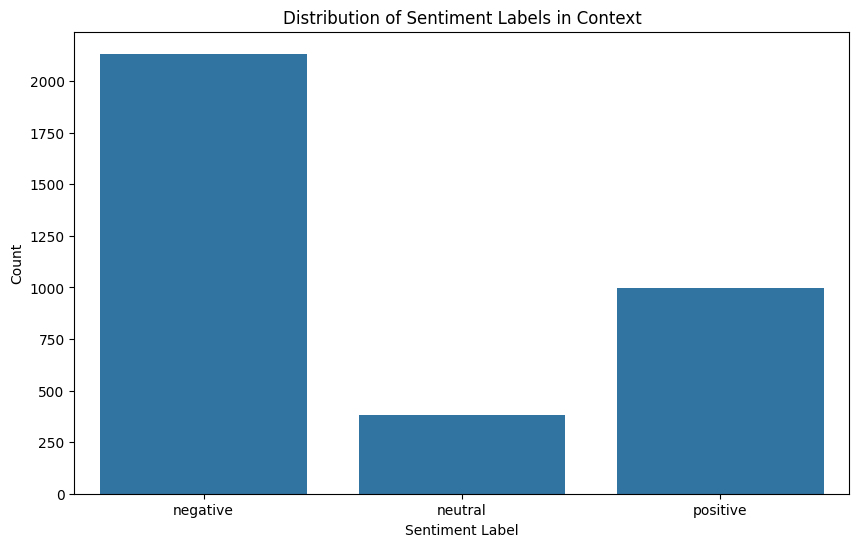

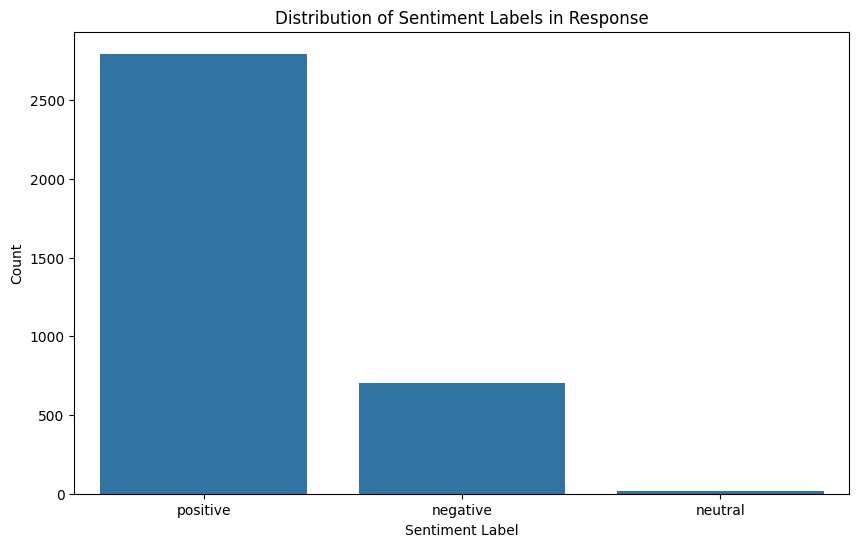

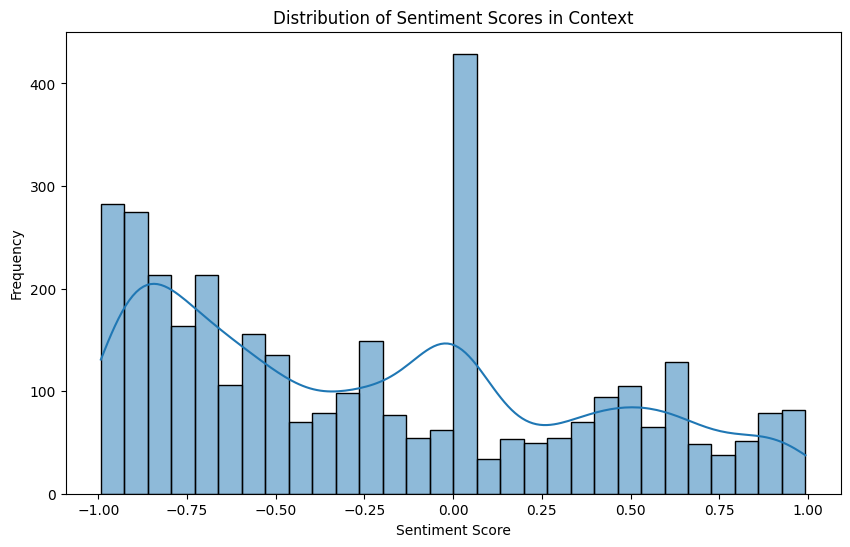

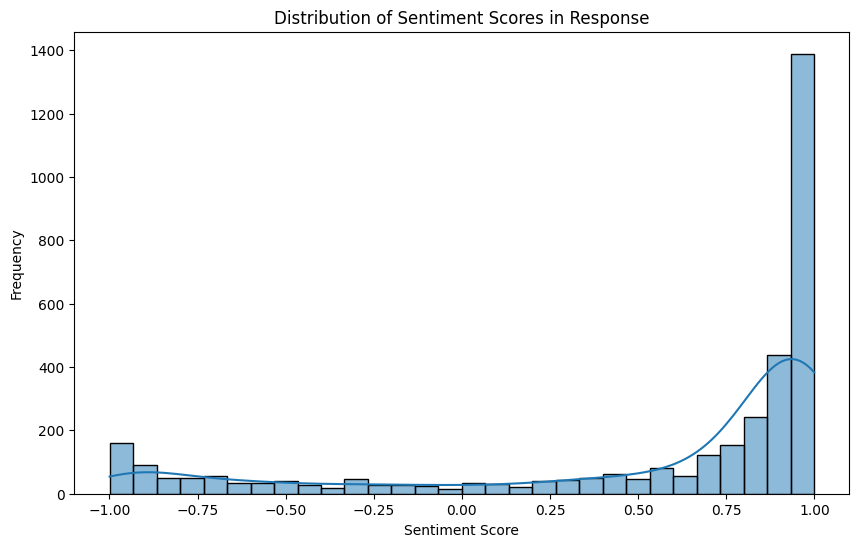

In [24]:
 import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns


context_sentiment_scores = np.array(df['Context_Sentiment_Score'])
response_sentiment_scores = np.array(df['Response_Sentiment_Score'])

plt.figure(figsize=(10, 6))
sns.countplot(x='Context_Sentiment_Label', data=df)
plt.title('Distribution of Sentiment Labels in Context')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Response_Sentiment_Label', data=df)
plt.title('Distribution of Sentiment Labels in Response')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(context_sentiment_scores, bins=30, kde=True)
plt.title('Distribution of Sentiment Scores in Context')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(response_sentiment_scores, bins=30, kde=True)
plt.title('Distribution of Sentiment Scores in Response')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [25]:
from huggingface_hub import notebook_login
notebook_login()

In [26]:
from transformers import pipeline
from tqdm import tqdm


emotion_detector = pipeline(model="bhadresh-savani/distilbert-base-uncased-emotion", top_k=None)

def detect_emotion_batch(texts, batch_size=32):
    emotions = []
    num_batches = len(texts) // batch_size + int(len(texts) % batch_size != 0)

    for i in tqdm(range(num_batches), desc="Processing batches", unit="batch"):
        start_idx = i * batch_size
        end_idx = (i + 1) * batch_size
        batch_texts = texts[start_idx:end_idx]

        try:

            batch_emotions = emotion_detector(batch_texts, truncation=True)
            emotions.extend(batch_emotions)
        except Exception as e:
            print(f"Error during emotion detection: {e}")

    return emotions


emotion_sensor = detect_emotion_batch(df['Context'].astype(str))


print("emotion", df['Context'])
print("sensor", emotion_sensor)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Processing batches: 100%|██████████| 110/110 [00:00<00:00, 2593.84batch/s]

Error during emotion detection: text input must be of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).
Error during emotion detection: text input must be of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).
Error during emotion detection: text input must be of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).
Error during emotion detection: text input must be of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).
Error during emotion detection: text input must be of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).
Error during emotion detection: text input must be of t

In [27]:
from transformers import pipeline
import pandas as pd
from tqdm import tqdm

emotion_detector =  pipeline("text-classification", model="HRSMalik/EmotModel")


def detect_emotion_batch(texts, batch_size=32):
    emotions = []
    num_batches = len(texts) // batch_size + int(len(texts) % batch_size != 0)

    for i in tqdm(range(num_batches), desc="Processing batches", unit="batch"):
        start_idx = i * batch_size
        end_idx = (i + 1) * batch_size
        batch_texts = texts[start_idx:end_idx].tolist()

        try:

            batch_emotions = emotion_detector(batch_texts, truncation=True)
            emotions.extend(batch_emotions)
        except Exception as e:
            print(f"Error during emotion detection: {e}")

    return emotions


emotion_sensor = detect_emotion_batch(df['Context'].astype(str))

print("emotion", df['Context'])
print("sensor", emotion_sensor)


Processing batches: 100%|██████████| 110/110 [08:45<00:00,  4.78s/batch]

emotion 0       I'm going through some things with my feelings...
1       I'm going through some things with my feelings...
2       I'm going through some things with my feelings...
3       I'm going through some things with my feelings...
4       I'm going through some things with my feelings...
                              ...                        
3507    My grandson's step-mother sends him to school ...
3508    My boyfriend is in recovery from drug addictio...
3509    The birth mother attempted suicide several tim...
3510    I think adult life is making him depressed and...
3511    I just took a job that requires me to travel f...
Name: Context, Length: 3512, dtype: object
sensor [[{'label': 'sadness', 'score': 0.9984757304191589}, {'label': 'anger', 'score': 0.0006727561121806502}, {'label': 'joy', 'score': 0.0003246706910431385}, {'label': 'love', 'score': 0.00019880612671840936}, {'label': 'surprise', 'score': 0.00017731860862113535}, {'label': 'fear', 'score': 0.000150689578

<ipython-input-28-fab4d2ed1acf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Emotion_Context', data=df, palette='viridis')


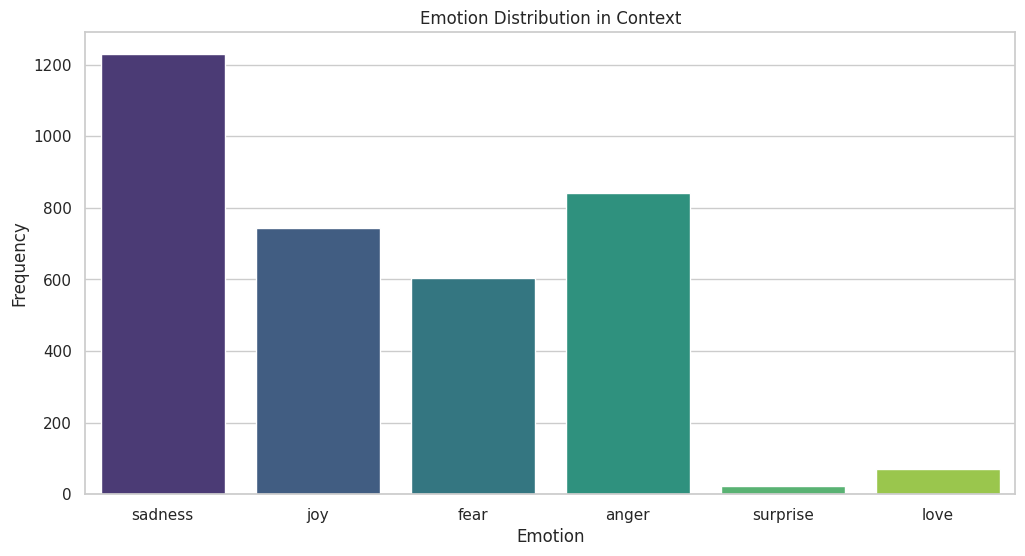

<ipython-input-28-fab4d2ed1acf>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Emotion_Response', data=df, palette='magma')


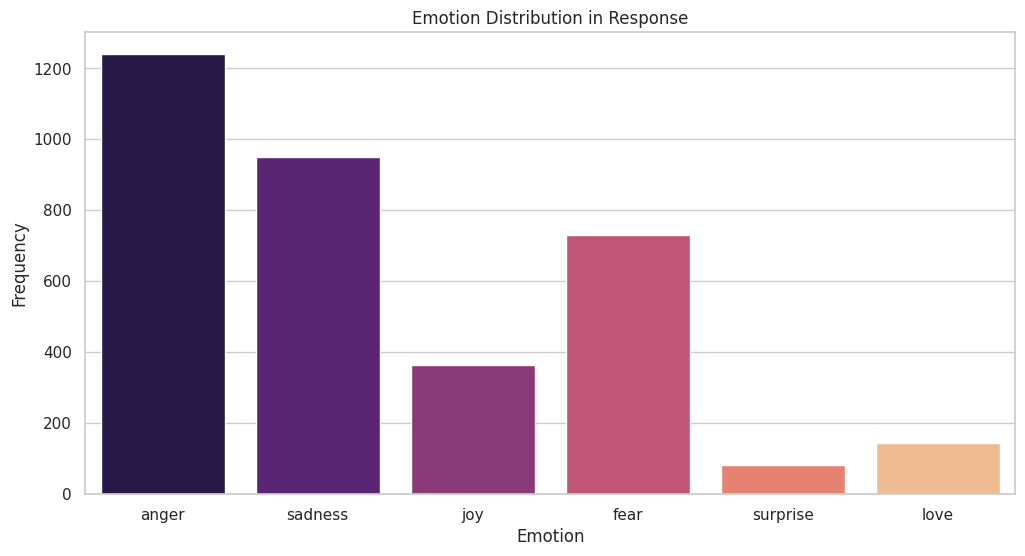

In [28]:
df['Emotion_Context'] = [emotion[0]['label'] for emotion in emotion_sensor]


sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(x='Emotion_Context', data=df, palette='viridis')
plt.title('Emotion Distribution in Context')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.show()


df['Emotion_Response'] = [emotion[1]['label'] for emotion in emotion_sensor]

plt.figure(figsize=(12, 6))
sns.countplot(x='Emotion_Response', data=df, palette='magma')
plt.title('Emotion Distribution in Response')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.show()


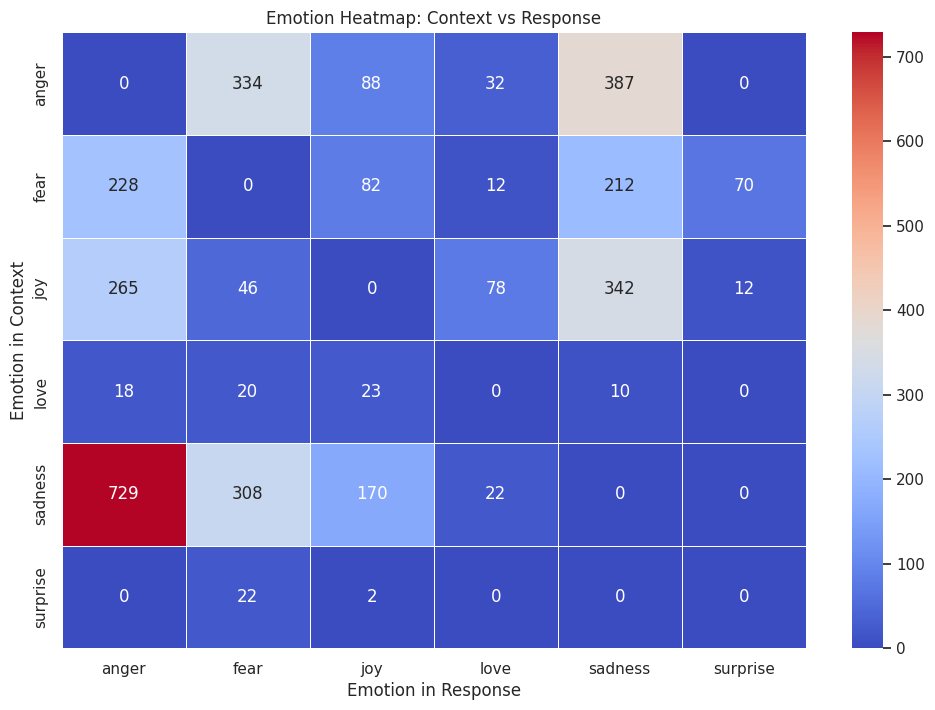

In [29]:
cross_tab = pd.crosstab(df['Emotion_Context'], df['Emotion_Response'])

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="coolwarm", linewidths=.5)

plt.title('Emotion Heatmap: Context vs Response')
plt.xlabel('Emotion in Response')
plt.ylabel('Emotion in Context')
plt.show()


In [31]:
!pip install --upgrade wordcloud
!pip install --upgrade pillow
!pip install --upgrade pip


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


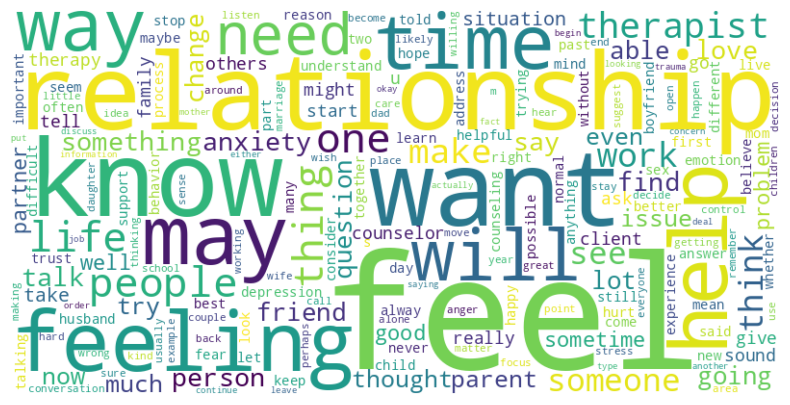

In [34]:
from wordcloud import WordCloud

cross_tab = pd.crosstab(df['Context'], df['Response'])

text = ' '.join(df['Context'].astype(str) + ' ' + df['Response'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()





<ipython-input-35-4e66209003cd>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(filtered_wordcloud.values()), y=list(filtered_wordcloud.keys()), palette='coolwarm')


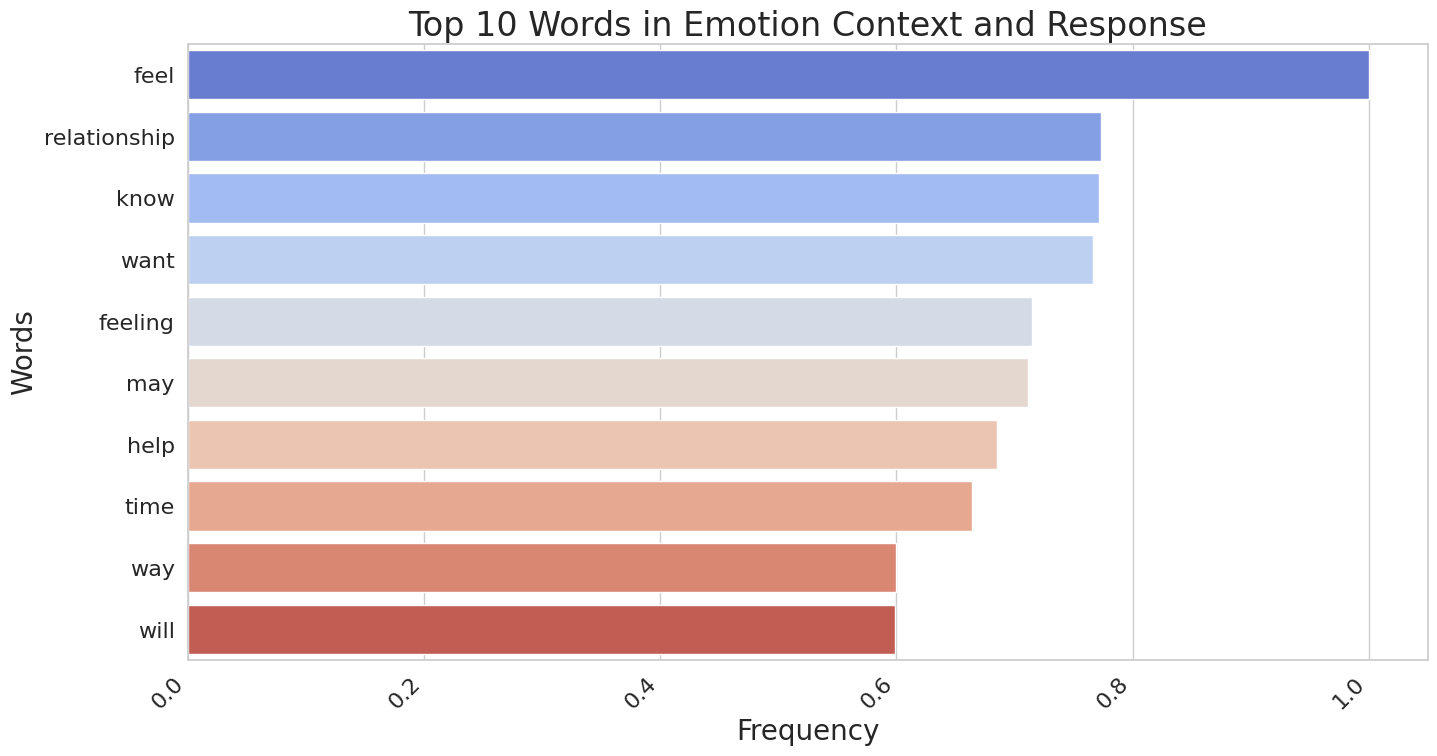

In [35]:

cross_tab = pd.crosstab(df['Context'], df['Response'])

text = ' '.join(df['Context'].astype(str) + ' ' + df['Response'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

top_10_words = list(wordcloud.words_.keys())[:10]


filtered_wordcloud = {word: wordcloud.words_[word] for word in top_10_words}


plt.figure(figsize=(16, 8))
sns.barplot(x=list(filtered_wordcloud.values()), y=list(filtered_wordcloud.keys()), palette='coolwarm')

plt.title('Top 10 Words in Emotion Context and Response', fontsize=24)
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Words', fontsize=20)

plt.yticks(fontsize=16)

plt.xticks(rotation=45, ha='right', fontsize=16)

plt.show()


<ipython-input-36-4660f0eccb84>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(filtered_context_wordcloud.values()), y=list(filtered_context_wordcloud.keys()), palette='coolwarm')


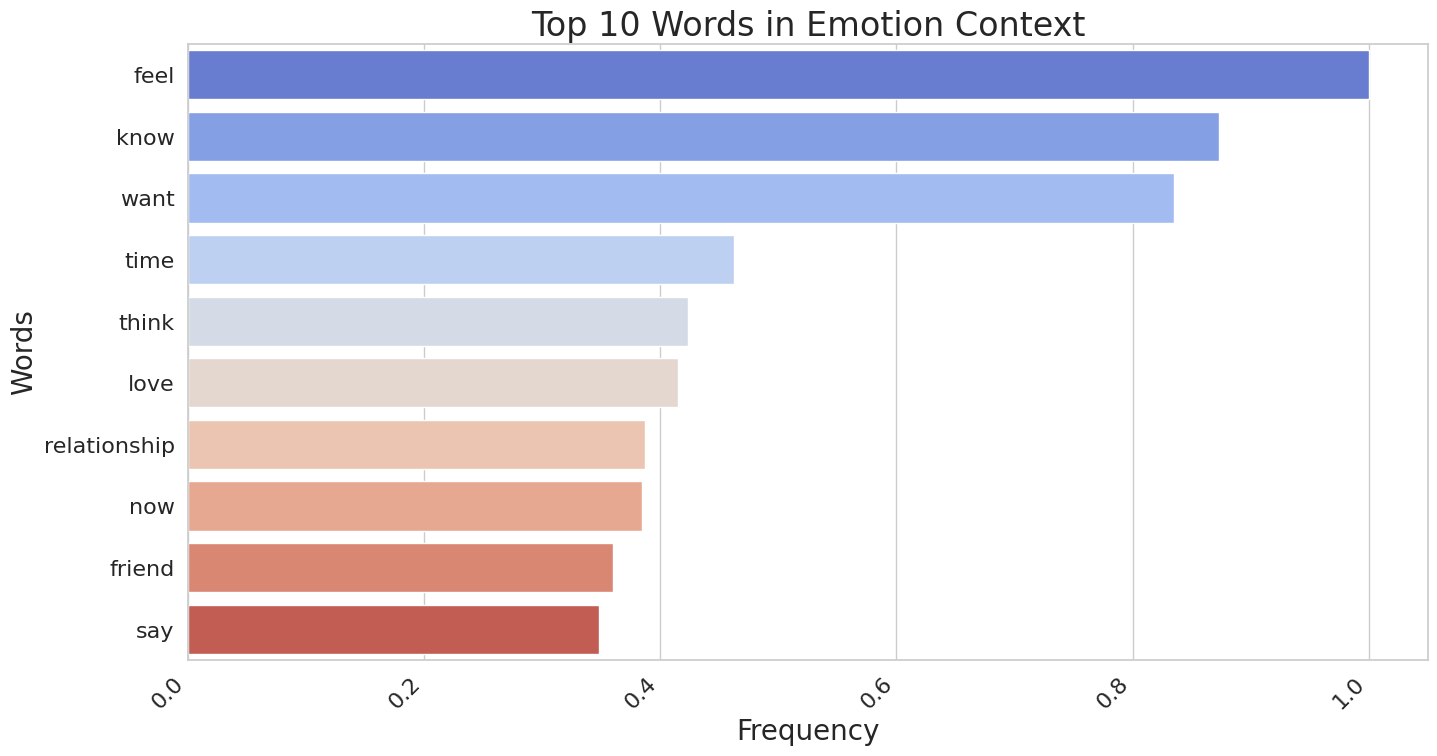

<ipython-input-36-4660f0eccb84>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(filtered_response_wordcloud.values()), y=list(filtered_response_wordcloud.keys()), palette='coolwarm')


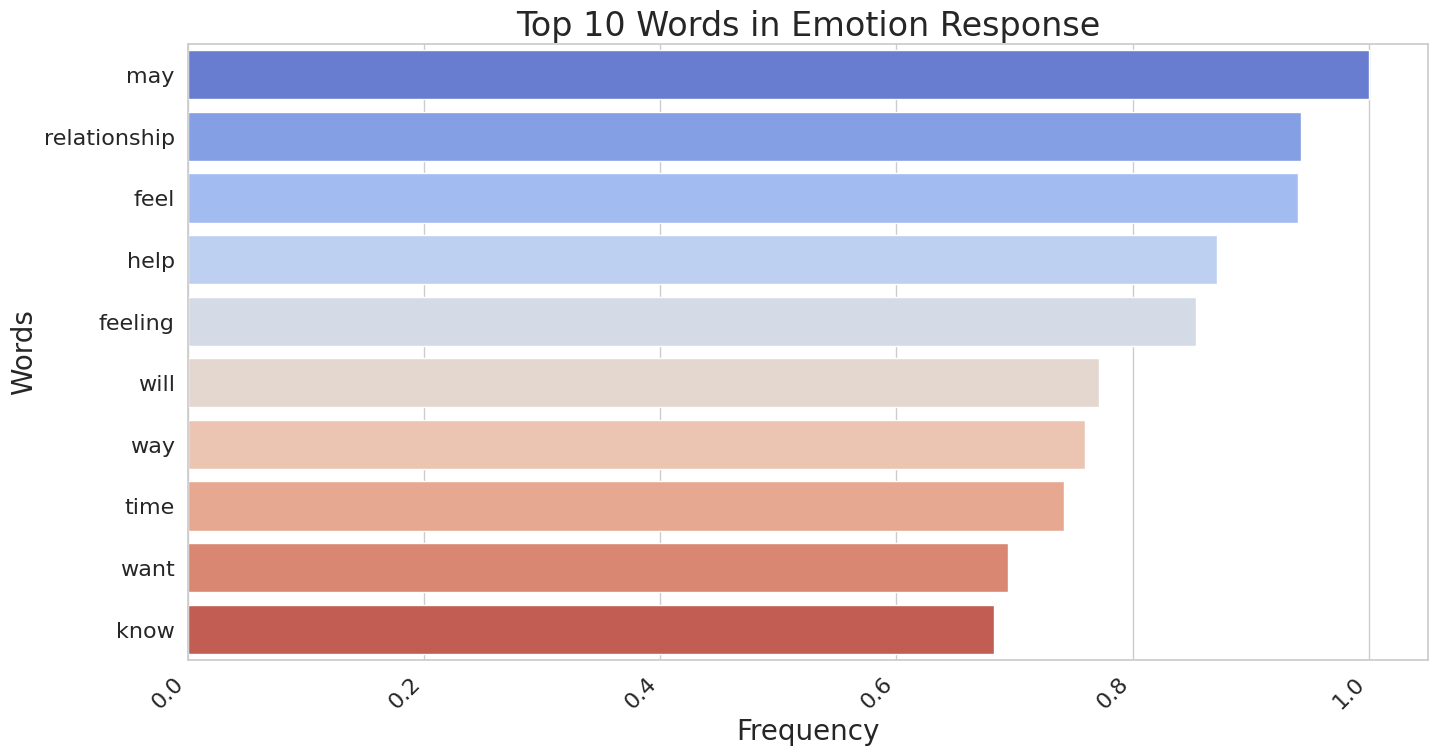

In [36]:

cross_tab = pd.crosstab(df['Context'], df['Response'])

context_text = ' '.join(df['Context'].astype(str))


context_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(context_text)


top_10_context_words = list(context_wordcloud.words_.keys())[:10]


filtered_context_wordcloud = {word: context_wordcloud.words_[word] for word in top_10_context_words}

plt.figure(figsize=(16, 8))
sns.barplot(x=list(filtered_context_wordcloud.values()), y=list(filtered_context_wordcloud.keys()), palette='coolwarm')

plt.title('Top 10 Words in Emotion Context', fontsize=24)
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Words', fontsize=20)


plt.yticks(fontsize=16)

plt.xticks(rotation=45, ha='right', fontsize=16)

plt.show()


response_text = ' '.join(df['Response'].astype(str))


response_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(response_text)

top_10_response_words = list(response_wordcloud.words_.keys())[:10]


filtered_response_wordcloud = {word: response_wordcloud.words_[word] for word in top_10_response_words}


plt.figure(figsize=(16, 8))
sns.barplot(x=list(filtered_response_wordcloud.values()), y=list(filtered_response_wordcloud.keys()), palette='coolwarm')

plt.title('Top 10 Words in Emotion Response', fontsize=24)
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Words', fontsize=20)


plt.yticks(fontsize=16)


plt.xticks(rotation=45, ha='right', fontsize=16)

plt.show()


In [ ]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable


In [38]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [40]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

df['Context'] = df['Context'].fillna('')
df['Response'] = df['Response'].fillna('')


df['Combined_Text'] = df['Context'] + ' ' + df['Response']


tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Combined_Text'])


feature_names = tfidf_vectorizer.get_feature_names_out()


keywords_with_scores = []
for i, row in enumerate(tfidf_matrix):
    features = row.nonzero()[1]
    keyword_scores = [(feature_names[idx], row[0, idx]) for idx in features]
    keywords_with_scores.extend(keyword_scores)


sorted_keywords = sorted(keywords_with_scores, key=lambda x: x[1], reverse=True)


top_keywords = sorted_keywords[:10]
print("Top Keywords with TF-IDF Scores:")
for keyword, score in top_keywords:
    print(f"{keyword}: {score}")


Top Keywords with TF-IDF Scores:
sleep: 1.0
dog: 0.8706796392835826
dog: 0.8706796392835826
heh: 0.8323886984475493
voices: 0.7930047759550849
voices: 0.7930047759550849
child: 0.7804387465803996
child: 0.7804387465803996
toilet: 0.7640031442279334
toilet: 0.7640031442279334


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Response'])


feature_names = tfidf_vectorizer.get_feature_names_out()


response_index = 0
response_tfidf_scores = tfidf_matrix[response_index].toarray()[0]


keywords_with_scores = [(feature_names[i], response_tfidf_scores[i]) for i in range(len(feature_names))]

sorted_keywords = sorted(keywords_with_scores, key=lambda x: x[1], reverse=True)

top_keywords_count = 10
print(f"Top {top_keywords_count} Therapeutic Technique Keywords:")
for keyword, score in sorted_keywords[:top_keywords_count]:
    print(f"{keyword}: {score}")


Top 10 Therapeutic Technique Keywords:
worthless: 0.386445854038614
round: 0.3718923284122281
terrible: 0.25603397833294533
good: 0.19251271212037366
knocked: 0.18594616420611404
bad: 0.18444657029674336
social: 0.18090897294022898
saturated: 0.17704591829008867
feelings: 0.17105439159302788
inspirational: 0.17073109331686404


In [47]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
import nltk
nltk.download('punkt_tab')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(words)

df['Processed_Response'] = df['Response'].apply(preprocess_text)


tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Processed_Response'])

feature_names = tfidf_vectorizer.get_feature_names_out()

top_keywords_indices = tfidf_matrix.sum(axis=0).A1.argsort()[::-1][:10]

top_keywords = [feature_names[idx] for idx in top_keywords_indices]

print("Top 10 Emotional Keywords:")
for keyword in top_keywords:
    print(keyword)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 Emotional Keywords:
feel
relationship
help
like
therapist
time
people
know
way
want


In [50]:
from sklearn.model_selection import train_test_split

X = df['Context'].astype(str).tolist()
Y = df['Response'].astype(str).tolist()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


Training set size: 2809
Testing set size: 703


In [51]:
!pip install sentencepiece
